In [0]:
import pandas as pd
import seaborn as sns
import re
import string
import warnings
!pip install pyspellchecker
from spellchecker import SpellChecker
import spacy
import nltk
nltk.download("all")
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
% matplotlib inline

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [0]:
df = pd.read_csv("Commentaires.csv")

# Analyse

In [0]:
df.head()

,review_body,review_date
0,Have to admit I am not a great fan of McDonald...,"February 29, 2020"
1,Food was fine. Staff were undesirably rude!Fam...,"February 15, 2020"
2,We went here to enjoy the Golden Arches fries....,"November 5, 2019"
3,When I visited this McDonalds I was excited to...,"November 2, 2019"
4,This restaurent was a mad uprade from the one ...,"October 2, 2019"


In [0]:
df.tail()

,review_body,review_date
535,This place was packed for lunch. More register...,"January 31, 2012"
536,Well if you're run out of idea or you need to ...,"December 14, 2011"
537,We were surprised to find a McD in Paris with ...,"September 10, 2009"
538,We stopped when we were walking by because we ...,"February 7, 2009"
539,Quarter Pounder with Cheese cravings happen.,"June 22, 2008"


In [0]:
print("Formde du dataframe : ", df.shape)

Formde du dataframe :  (540, 2)


In [0]:
df.isna().sum()

review_body    0
review_date    0
dtype: int64

In [0]:
print("Pourcentage des valeurs nulles :")
print("Train set : ")
print((df.isna().sum() / df.shape[0]) * 100)

Pourcentage des valeurs nulles :
Train set : 
review_body    0.0
review_date    0.0
dtype: float64


In [0]:
df.dtypes

review_body    object
review_date    object
dtype: object

In [0]:
view_size = 30
view_df = df.iloc[:view_size,:].copy()

for _, row in view_df.iterrows():
  print(row["review_body"])

Have to admit I am not a great fan of McDonalds but it is a great place for a quickish snack, I doubt it can really be classed as a 'Fast Food establishment' anymore.The one on the Champs Elysees occupies an ideal position from the Company's point of view just a 100 mtrs from the Arc de Triomphe it is extremely busy, but a large restaurant with an upstairs seating area which means I was coping even at lunchtime.The food was no different to any other McDonalds I have ever visited and well priced compared with any place to eat near a Paris landmark/tourist attraction, we saw coffee on sale near the Eifel Tower at 16 euros per cup, were charge 22 euros for a cup of tea, small beer and small bottle of water more than half a mile from the tower so that in itself is a major point.Ordering is almost totally be card/automatic ordering machine which I personally find a little difficult to understand but would be child's play to most regular uses and there does seem to be ample machines within t

In [0]:
# plt.figure(figsize=(15,10))
# df["review_date"].size().sort_values(ascending=False).plot.bar()
# plt.xticks(rotation=50)
# plt.xlabel("Date du commentaire")
# plt.ylabel("Nombre de commentaires")
# plt.show();

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

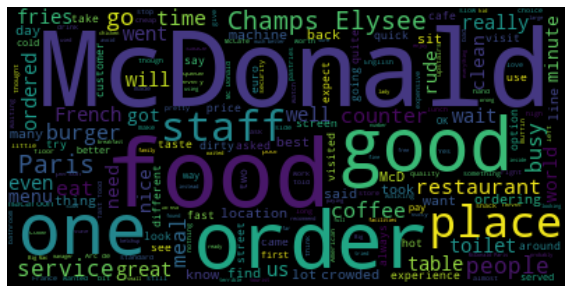

In [0]:
wordcloud = WordCloud().generate(' '.join(df['review_body']))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Nettoyage

1. Emojis

In [0]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [0]:
# Suppression des Emojis
df["review_body"] = df["review_body"].apply(remove_emoji)

2. Suppression des hashtags

In [0]:
# Suppression des Hashtags
df["has_hashtag"] = df["review_body"].str.contains("#")
df["review_body"] = df['review_body'].str.replace('#', '')

In [0]:
# Encodage de la colonne hashtag
hasghtag_lbl = LabelEncoder()
if "has_hashtag" in df.columns:
    df["has_hashtag"] = hasghtag_lbl.fit_transform(df["has_hashtag"])

In [0]:
df.head()

,review_body,review_date,has_hashtag
0,Have to admit I am not a great fan of McDonald...,"February 29, 2020",0
1,Food was fine. Staff were undesirably rude!Fam...,"February 15, 2020",0
2,We went here to enjoy the Golden Arches fries....,"November 5, 2019",0
3,When I visited this McDonalds I was excited to...,"November 2, 2019",0
4,This restaurent was a mad uprade from the one ...,"October 2, 2019",0


In [0]:
df.tail()

,review_body,review_date,has_hashtag
535,This place was packed for lunch. More register...,"January 31, 2012",0
536,Well if you're run out of idea or you need to ...,"December 14, 2011",0
537,We were surprised to find a McD in Paris with ...,"September 10, 2009",0
538,We stopped when we were walking by because we ...,"February 7, 2009",0
539,Quarter Pounder with Cheese cravings happen.,"June 22, 2008",0


In [0]:
print("Nombre de commentaires qui ont possédé un hashtag avant le nettoyage : ", df["has_hashtag"].sum())

Nombre de commentaires qui ont possédé un hashtag avant le nettoyage :  2


3. Liens

In [0]:
def remove_urls(text):
  #return re.sub(r'http\S+', '', text)
   return re.compile(r'https?://\S+|www\.\S+').sub(r'',text)

In [0]:
# Suppression des liens
df["review_body"] = df["review_body"].apply(remove_urls)

In [0]:
df.head()

,review_body,review_date,has_hashtag
0,Have to admit I am not a great fan of McDonald...,"February 29, 2020",0
1,Food was fine. Staff were undesirably rude!Fam...,"February 15, 2020",0
2,We went here to enjoy the Golden Arches fries....,"November 5, 2019",0
3,When I visited this McDonalds I was excited to...,"November 2, 2019",0
4,This restaurent was a mad uprade from the one ...,"October 2, 2019",0


4. Ponctutation

In [0]:
df["review_body"] = df["review_body"].str.replace('[{}]'.format(string.punctuation), '')

In [0]:
for _, row in df.iloc[:20,:].iterrows():
  print(row["review_body"])

Have to admit I am not a great fan of McDonalds but it is a great place for a quickish snack I doubt it can really be classed as a Fast Food establishment anymoreThe one on the Champs Elysees occupies an ideal position from the Companys point of view just a 100 mtrs from the Arc de Triomphe it is extremely busy but a large restaurant with an upstairs seating area which means I was coping even at lunchtimeThe food was no different to any other McDonalds I have ever visited and well priced compared with any place to eat near a Paris landmarktourist attraction we saw coffee on sale near the Eifel Tower at 16 euros per cup were charge 22 euros for a cup of tea small beer and small bottle of water more than half a mile from the tower so that in itself is a major pointOrdering is almost totally be cardautomatic ordering machine which I personally find a little difficult to understand but would be childs play to most regular uses and there does seem to be ample machines within the takeawaycaf

5. Tags HTML

In [0]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

df["review_body"] = df["review_body"].astype(str)
df['review_body'] = df['review_body'].apply(lambda x : remove_html(x))

6. Correction de l'ortographe

In [0]:
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

# df['review_body'] = df['review_body'].apply(lambda x : correct_spellings(x))

Visualisation des mots les plus courants :

In [0]:
data = df["review_body"].copy()

In [0]:
data.head()

0    Have to admit I am not a great fan of McDonald...
1    Food was fine Staff were undesirably rudeFamil...
2    We went here to enjoy the Golden Arches fries ...
3    When I visited this McDonalds I was excited to...
4    This restaurent was a mad uprade from the one ...
Name: review_body, dtype: object

All frequencies, including STOPWORDS:
  Word  Frequency
0  the       1850
1  and       1120
2    a        980
3   to        960
4  was        692
5   in        592
6    i        578
7   of        512
8   it        458
9   is        416


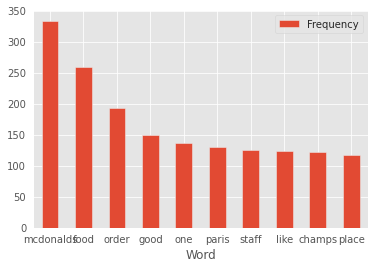

In [0]:
import matplotlib
top_N = 10

txt = data.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words_ = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words_)

stopwords_ = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words_ if w not in stopwords_) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0);

7. Tokenization

In [0]:
def tokenize(text):
  return nltk.word_tokenize(text)

df['review_body'] = df['review_body'].apply(tokenize)

In [0]:
df.head()

,review_body,review_date,has_hashtag
0,"[Have, to, admit, I, am, not, a, great, fan, o...","February 29, 2020",0
1,"[Food, was, fine, Staff, were, undesirably, ru...","February 15, 2020",0
2,"[We, went, here, to, enjoy, the, Golden, Arche...","November 5, 2019",0
3,"[When, I, visited, this, McDonalds, I, was, ex...","November 2, 2019",0
4,"[This, restaurent, was, a, mad, uprade, from, ...","October 2, 2019",0


8. Chiffres

In [0]:
do_they = list()
for _, row in df.iterrows():
  result = False
  for s in row["review_body"]:
    if s.isdigit():
        result = True
  do_they.append(result)
df["had_number"] = do_they

In [0]:
df.head()

,review_body,review_date,has_hashtag,had_number
0,"[Have, to, admit, I, am, not, a, great, fan, o...","February 29, 2020",0,True
1,"[Food, was, fine, Staff, were, undesirably, ru...","February 15, 2020",0,False
2,"[We, went, here, to, enjoy, the, Golden, Arche...","November 5, 2019",0,False
3,"[When, I, visited, this, McDonalds, I, was, ex...","November 2, 2019",0,True
4,"[This, restaurent, was, a, mad, uprade, from, ...","October 2, 2019",0,True


9. Stopwords

In [0]:
sp = spacy.load('en_core_web_sm')

all_stopwords = sp.Defaults.stop_words

def remove_stopwords(text):
  return [word for word in text if not word in all_stopwords]

In [0]:
df['review_body'] = df['review_body'].apply(remove_stopwords)

10. Chiffres

In [0]:
for _, row in df.iterrows():
  for index, word in enumerate(row["review_body"]):
    if word.isdigit():
      row["review_body"].pop(index)

In [0]:
df.head()

,review_body,review_date,has_hashtag,had_number
0,"[Have, admit, I, great, fan, McDonalds, great,...","February 29, 2020",0,True
1,"[Food, fine, Staff, undesirably, rudeFamily, o...","February 15, 2020",0,False
2,"[We, went, enjoy, Golden, Arches, fries, Easy,...","November 5, 2019",0,False
3,"[When, I, visited, McDonalds, I, excited, opti...","November 2, 2019",0,True
4,"[This, restaurent, mad, uprade, United, Kingdo...","October 2, 2019",0,True


In [0]:
df.isna().sum()

review_body    0
review_date    0
has_hashtag    0
had_number     0
dtype: int64

# Count Vectorizer (BOW)

In [0]:
def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [0]:
df.head()

,review_body,review_date,has_hashtag,had_number
0,"[Have, admit, I, great, fan, McDonalds, great,...","February 29, 2020",0,True
1,"[Food, fine, Staff, undesirably, rudeFamily, o...","February 15, 2020",0,False
2,"[We, went, enjoy, Golden, Arches, fries, Easy,...","November 5, 2019",0,False
3,"[When, I, visited, McDonalds, I, excited, opti...","November 2, 2019",0,True
4,"[This, restaurent, mad, uprade, United, Kingdo...","October 2, 2019",0,True


In [0]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['review_body'])

In [0]:
bow_transformer.vocabulary_

{'AbusyMcDonald’sIt’sprettyMcDonald’svisitThetouchscreenseasyordermanagedorderwrong': 0,
 'AfterorderingscreenentrancetookhalfhourburgerIthinklostorderminsIaskedmanagerscheckHesaidreturnedVerybadserviceminlaterIaskedgirlcountergaveburgerseeingorderedminutesDo': 1,
 'AllhamburgerscoldThecheesemeltedburgersbunsweren’tfreshFrenchfriescoldThecoffeegoodthingeurosspentgarbagefood': 2,
 'AlthoughlocatedcharmingcrowdedstreetsParislikearentdealwithInteriorsdirtydarkfarfunnytraditionalMcsmoodBesideswaitlottimelineslowLastlyfrenchfriessaltlessHorrible': 3,
 'AmobsceneunlikeMcDonaldsstatesTwofloorsstreamingpeopleTheretamstylefastordermachinesdessertbarusualcounterlinesIfbudgetenjoycrazyscene': 4,
 'AnordinarymcdonaldsmenupricesNeedlessIexpectdifferentWhatIlikedviewAvenuedesChampsÉlysées': 5,
 'AsusualMcDonaldsoffersstandardmenutrustThisparticularshopfreewifecleanbathroomsairconselfservicekioskgreatseatingareaItrefreshingParisfoodgenerallyexpensiveGreatvaluemoney': 6,
 'AtypicalMacwantedideadecentM

In [0]:
print("Nombre de mots dans le vocabulaire : ", len(bow_transformer.vocabulary_))

Nombre de mots dans le vocabulaire :  270


In [0]:
commentaire = df['review_body'][3]
print(commentaire)

['When', 'I', 'visited', 'McDonalds', 'I', 'excited', 'options', 'don', '’', 't', 'menu', 'Ireland', 'However', 'bacon', 'blue', 'cheese', 'burger', 'fries', 'served', 'barely', 'warm', 'cheese', 'wasn', '’', 't', 'slightly', 'melted', 'bun', 'burger', 'dry', 'Also', 'queued', 'minutes', 'use', 'toilet', 'stall', 'operation', 'filthy', 'blocked', 'Considering', 'prices', 'high', 'compared', 'McDonalds', 'need', 'better', 'I', 'return']


In [0]:
print(bow_transformer.transform([commentaire]))

  (0, 247)	1


In [0]:
commentaires_bow = bow_transformer.transform(df['review_body'])

In [0]:
print('Taille de la matrice ', commentaires_bow.shape)

Taille de la matrice  (540, 270)


In [0]:
print(commentaires_bow.nnz)

540


# TF-IDF

In [0]:
tfidf_transformer = TfidfTransformer().fit(commentaires_bow)
tfidf = tfidf_transformer.transform(commentaires_bow)
print(tfidf)

  (0, 49)	1.0
  (1, 32)	1.0
  (2, 243)	1.0
  (3, 247)	1.0
  (4, 187)	1.0
  (5, 167)	1.0
  (6, 23)	1.0
  (7, 35)	1.0
  (8, 142)	1.0
  (9, 46)	1.0
  (10, 49)	1.0
  (11, 32)	1.0
  (12, 243)	1.0
  (13, 247)	1.0
  (14, 187)	1.0
  (15, 167)	1.0
  (16, 23)	1.0
  (17, 35)	1.0
  (18, 142)	1.0
  (19, 46)	1.0
  (20, 108)	1.0
  (21, 33)	1.0
  (22, 14)	1.0
  (23, 164)	1.0
  (24, 235)	1.0
  :	:
  (515, 265)	1.0
  (516, 139)	1.0
  (517, 112)	1.0
  (518, 268)	1.0
  (519, 99)	1.0
  (520, 155)	1.0
  (521, 128)	1.0
  (522, 141)	1.0
  (523, 228)	1.0
  (524, 102)	1.0
  (525, 182)	1.0
  (526, 219)	1.0
  (527, 232)	1.0
  (528, 231)	1.0
  (529, 132)	1.0
  (530, 155)	1.0
  (531, 128)	1.0
  (532, 141)	1.0
  (533, 228)	1.0
  (534, 102)	1.0
  (535, 182)	1.0
  (536, 219)	1.0
  (537, 232)	1.0
  (538, 231)	1.0
  (539, 132)	1.0


In [0]:
tfidf_transformer = TfidfTransformer().fit(commentaires_bow)
commentaires_tfidf = tfidf_transformer.transform(commentaires_bow)